<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/RSX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [314]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price. 

In [315]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 2)


In [317]:
#Get the stock quote
data = yf.download('RSX', start=start_date, end=end_date)
#df = web.DataReader('RSX', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,25.150000,25.650000,25.150000,25.620001,24.803146,8113700
2020-01-03,25.110001,25.280001,25.080000,25.100000,24.299725,7083800
2020-01-06,25.100000,25.420000,25.100000,25.400000,24.590158,6622900
2020-01-07,25.350000,25.430000,25.280001,25.290001,24.483667,3842400
2020-01-08,25.580000,25.870001,25.500000,25.760000,24.938683,8828900
...,...,...,...,...,...,...
2021-07-15,28.559999,28.690001,28.490000,28.549999,28.549999,3180900
2021-07-16,28.530001,28.570000,28.209999,28.320000,28.320000,3059000
2021-07-19,27.700001,27.740000,27.450001,27.540001,27.540001,4369700


In [318]:
#Get the number of rows and columns in the data set
data.shape



(398, 6)

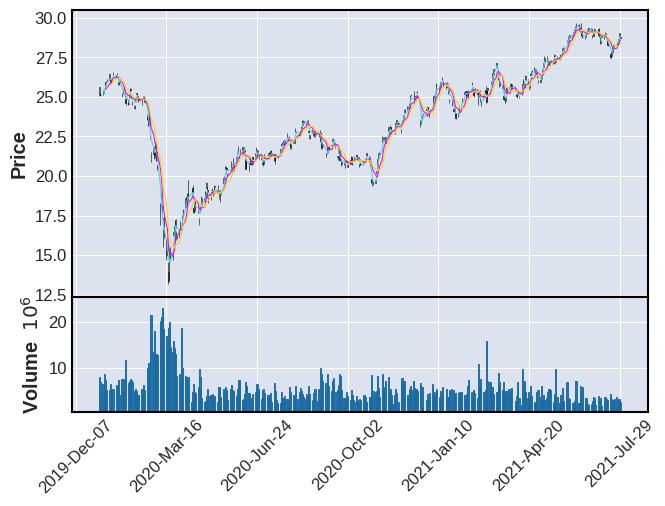

In [319]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [320]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

319

In [321]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.75836434],
       [0.72614622],
       [0.74473353],
       [0.73791825],
       [0.7670384 ],
       [0.77261462],
       [0.78252787],
       [0.80916977],
       [0.77695165],
       [0.7800495 ],
       [0.79491937],
       [0.81722424],
       [0.80235437],
       [0.79491937],
       [0.7800495 ],
       [0.77323422],
       [0.72552663],
       [0.74845097],
       [0.75464678],
       [0.7335811 ],
       [0.69516729],
       [0.69516729],
       [0.72304826],
       [0.74845097],
       [0.72614622],
       [0.69516729],
       [0.68649311],
       [0.71003716],
       [0.73667906],
       [0.71437419],
       [0.70693932],
       [0.69826513],
       [0.7211896 ],
       [0.70693932],
       [0.70693932],
       [0.63382901],
       [0.60904577],
       [0.6084263 ],
       [0.55762075],
       [0.4950434 ],
       [0.51796775],
       [0.49256503],
       [0.5346964 ],
       [0.47211894],
       [0.448575  ],
       [0.22800491],
       [0.33890955],
       [0.260

In [322]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.75836434, 0.72614622, 0.74473353, 0.73791825, 0.7670384 ,
       0.77261462, 0.78252787, 0.80916977, 0.77695165, 0.7800495 ,
       0.79491937, 0.81722424, 0.80235437, 0.79491937, 0.7800495 ,
       0.77323422, 0.72552663, 0.74845097, 0.75464678, 0.7335811 ,
       0.69516729, 0.69516729, 0.72304826, 0.74845097, 0.72614622,
       0.69516729, 0.68649311, 0.71003716, 0.73667906, 0.71437419,
       0.70693932, 0.69826513, 0.7211896 , 0.70693932, 0.70693932,
       0.63382901, 0.60904577, 0.6084263 , 0.55762075, 0.4950434 ,
       0.51796775, 0.49256503, 0.5346964 , 0.47211894, 0.448575  ,
       0.22800491, 0.33890955, 0.26022303, 0.13258986, 0.24535316,
       0.09975215, 0.14807932, 0.        , 0.11524161, 0.08798018,
       0.11214371, 0.19206935, 0.21499382, 0.23853775, 0.17657989])]
[0.180297443567919]



In [323]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(259, 60, 1)

In [324]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [325]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [326]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

259/259 [==============================] - 12s 35ms/step - loss: 0.0296


In [327]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [328]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [329]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [330]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

0.6402683258056641

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


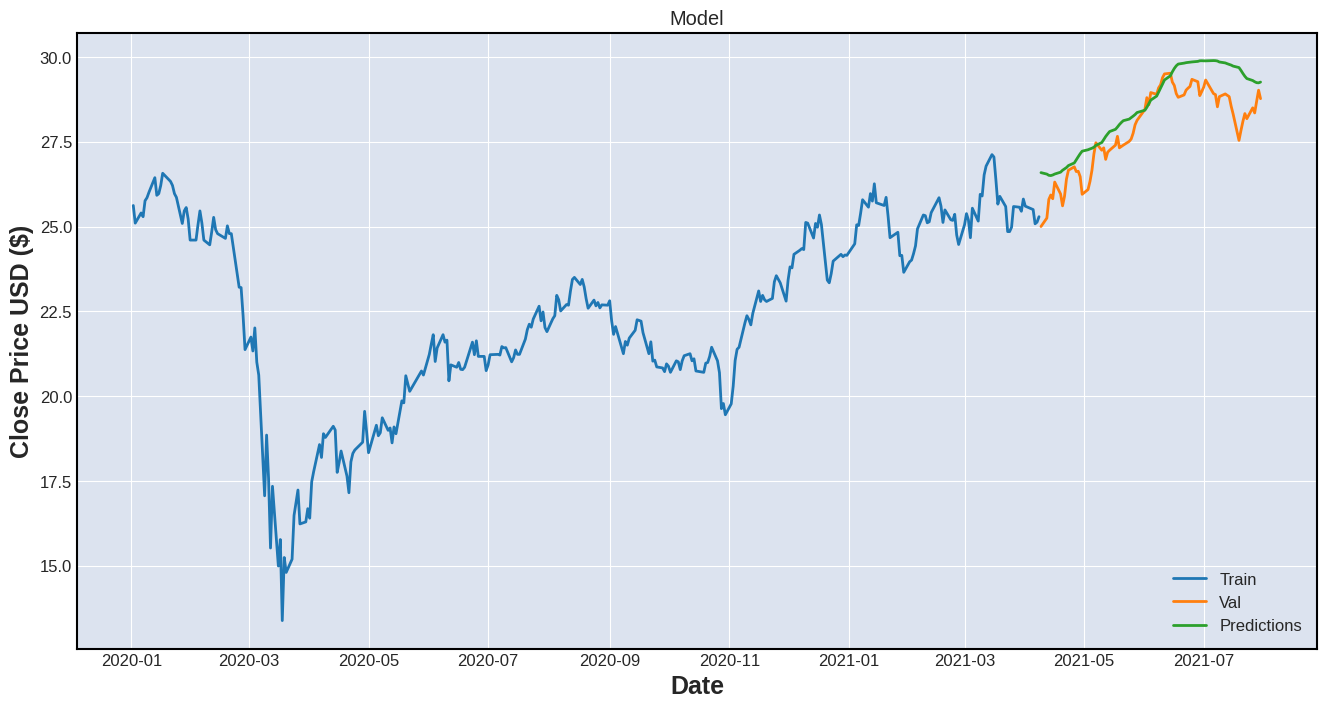

In [331]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [332]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-09,25.000000,26.588886
2021-04-12,25.250000,26.545708
2021-04-13,25.799999,26.509750
2021-04-14,25.930000,26.502472
2021-04-15,25.820000,26.519329
...,...,...
2021-07-26,28.500000,29.305115
2021-07-27,28.350000,29.268808
2021-07-28,28.690001,29.241753


In [333]:
#get the quote
apple_quote = yf.download('RSX', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[29.288681]]
